## Module 2D
## Tutorial 2 covers generating SPHARM-RPDM models, creating reports from models, and comparing models.
## Module 2D creates a synthetic cell using one of the models created in Module 2A

In [1]:
from cellorganizer.tools import slml2img
import os
from IPython.core.display import display, HTML, Image

folder_name = 'Module2D'
model_name =  'Module2A1' #SPHARM-RPDM models of cell and nuclear shape
model_file = "/home/murphylab/cellorganizer/local/models/" +  model_name + ".mat"

topdir = "/home/murphylab/cellorganizer/local/results"
outputdir = topdir + "/" + folder_name
if not os.path.exists(topdir):
    os.makedirs(topdir)
os.chdir(topdir)
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
os.chdir(outputdir)
if not os.path.exists(model_name):
    os.makedirs(model_name)
os.chdir(model_name)

options = {}
options['numberOfSynthesizedImages'] = 1
options['synthesis'] = 'framework'
options['model.spharm_rpdm.synthesis_method'] = 'reconstruction'
options['model.spharm_rpdm.imageSize'] = [205, 205, 10]
options['targetDirectory'] = os.getcwd()
options['prefix'] = 'img'
options['compression'] = 'lzw'
options['debug'] = 0
options['verbose'] = 1
options['display'] = 0

answer = slml2img([model_file], options)

In [2]:
from skimage import io
import numpy as np
img0 = np.transpose(io.imread(os.getcwd() + '/img/cell1/cell.tif'), (1, 2, 0))
img1 = np.transpose(io.imread(os.getcwd() + '/img/cell1/nucleus.tif'), (1, 2, 0))
print(img0.shape)
ishape = img0.shape
rgb=np.empty([ishape[0],ishape[1],3,ishape[2]],dtype=int)
print(np.amax(img0)) #max for all should be 255 (8-bit)
print(np.amax(img1))
rgb[:,:,0,:]=img0
rgb[:,:,1,:]=img1
rgb[:,:,2,:]=img1
print(rgb.shape)

(68, 99, 10)
255
255
(68, 99, 3, 10)


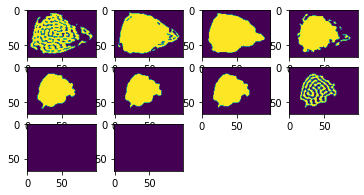

In [3]:
import matplotlib.pyplot as plt
import math
#Plot the individual xy slices of the 3D image
fig = plt.figure()
panels = math.ceil(math.sqrt(img0.shape[2]))
for i in range(img0.shape[2]):
    plt.subplot(panels,panels,i+1)
    plt.imshow(img0[:,:,i])
plt.show()

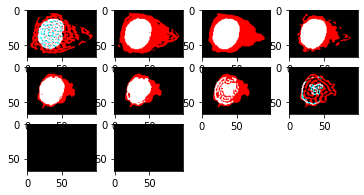

In [4]:
#Plot nucleus in yellow, cell in red
fig = plt.figure()
panels = math.ceil(math.sqrt(rgb.shape[3]))
for i in range(rgb.shape[3]):
    plt.subplot(panels,panels,i+1)
    plt.imshow(rgb[:,:,:,i])
plt.show()